In [3]:
from PIL import Image
import os

In [6]:
pwd

'e:\\CEI - Carbon Stock\\experiments\\OMNI-DC\\src'

### Sentinel and GEDI data

In [2]:
import ee

In [3]:
ee.Authenticate()

True

In [4]:
ee.Initialize(project='ee-khanhtran2101tq')

In [26]:
region = ee.Geometry.Point([105.8342, 21.0278]).buffer(2000).bounds()

In [27]:
s2 = ee.ImageCollection("COPERNICUS/S2_SR") \
        .filterBounds(region) \
        .filterDate("2022-01-01", "2022-01-15") \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\ee\deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


In [5]:
import ee
from IPython.display import Image

# Authenticate and initialize
ee.Authenticate()
ee.Initialize()

# Define ROI (Hanoi, Vietnam)
roi = ee.Geometry.Point([105.84117, 21.0245])

# Get least cloudy Sentinel-2 collection
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(roi) \
    .filterDate('2023-01-01', '2023-12-31') \
    .sort('CLOUDY_PIXEL_PERCENTAGE') 
# Select RGB bands
image = collection.first().select(['B4', 'B3', 'B2'])

# Visualization parameters
vis_params = {
    'min': 0,
    'max': 3000,
    'gamma': 1.3
}

# Get URL for the thumbnail
url = image.getThumbURL({
    'region': roi.buffer(10000).bounds().getInfo(),  # 10 km buffer around point
    'dimensions': 512,
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 3000
})

# Display the thumbnail
Image(url=url)


In [ ]:
import earthaccess  
earthaccess.login()


In [85]:
import ee
from IPython.display import Image
from datetime import datetime

ee.Authenticate()
ee.Initialize()

# Define a polygon (example area in Hanoi)
polygon_coords = [
    [
        [105.83, 21.03],  # bottom-left
        [105.85, 21.03],  # bottom-right
        [105.85, 21.04],  # top-right
        [105.83, 21.04],  # top-left
        [105.83, 21.03]   # close polygon
    ]
]
polygon = ee.Geometry.Polygon(polygon_coords)

# Load Sentinel-2 collection and filter by polygon
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(polygon) \
    .filterDate('2023-01-01', '2023-12-31') \
    .sort('CLOUDY_PIXEL_PERCENTAGE')

# Get least cloudy image
image = collection.first()

# Print some info
time_start = image.get('system:time_start').getInfo()
date = datetime.utcfromtimestamp(time_start / 1000)
print("Acquisition date:", date)

cloud = image.get('CLOUDY_PIXEL_PERCENTAGE').getInfo()
print("Cloud coverage:", cloud)

# Select RGB bands
rgb = image.select(['B4', 'B3', 'B2'])

# Generate thumbnail for the polygon
url = rgb.getThumbURL({
    'region': polygon.bounds().getInfo(),
    'dimensions': 512,
    'bands': ['B4','B3','B2'],
    'min': 0,
    'max': 3000
})

Image(url=url)  # Display thumbnail in Jupyter/Colab


Acquisition date: 2023-05-18 03:42:21.232000
Cloud coverage: 0.238609


In [70]:
collection.size().getInfo()

72

In [73]:
from datetime import datetime

time_start = image.get('system:time_start').getInfo()  # milliseconds
date = datetime.utcfromtimestamp(time_start / 1000)
print("Acquisition date (system:time_start):", date)

Acquisition date (system:time_start): 2023-05-18 03:42:21.232000


In [77]:
# Get the footprint (geometry) of the image
footprint = image.geometry()

# Convert to GeoJSON (dict) and get coordinates
coords = footprint.getInfo()['coordinates']
print("Image footprint coordinates:", coords)

# Optional: get bounding box
bbox = footprint.bounds().getInfo()['coordinates']
print("Bounding box coordinates:", bbox)

Image footprint coordinates: [[[104.99971056951262, 21.703428566795115], [104.99970976711302, 21.70341728524546], [104.99971172853428, 20.711508249933694], [104.99975077865318, 20.711466752773056], [104.99978403367057, 20.711421070213426], [104.99979990335957, 20.711418244973682], [106.05402757764384, 20.70819215383423], [106.05407215426531, 20.708228454943054], [106.05412121546821, 20.70825920596143], [106.0541243546681, 20.708274011797442], [106.05760423389657, 21.20416617089998], [106.0611864276054, 21.700021123241275], [106.06114732072116, 21.700062908097394], [106.06111422338724, 21.700108782946543], [106.06109834743232, 21.700111678950467], [104.99980667918231, 21.70350727961996], [104.99976201225078, 21.70347067196279], [104.99971279840042, 21.703439628304988], [104.99971056951262, 21.703428566795115]]]
Bounding box coordinates: [[[104.99970976711303, 20.708192153834204], [106.0611864276054, 20.708192153834204], [106.0611864276054, 21.70350727961999], [104.99970976711303, 21.703

In [79]:
footprint

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Image.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Image.select",
          "arguments": {
            "bandSelectors": {
              "constantValue": [
                "B4",
                "B3",
                "B2"
              ]
            },
            "input": {
              "functionInvocationValue": {
                "functionName": "Collection.first",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "Collection.limit",
                      "arguments": {
                        "collection": {
                          "functionInvocationValue": {
                            "functionName": "Collection.filter",
                            "arguments": {
                              "collection": {
                                "functi

In [74]:
# Option 2: Using DATE_ACQUIRED (if available)
date_acquired = image.get('DATE_ACQUIRED').getInfo()
print("Acquisition date (DATE_ACQUIRED):", date_acquired)

Acquisition date (DATE_ACQUIRED): None


In [3]:
from model.ognidc import OGNIDC

In [2]:
import model.ognidc

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [139]:
from mmengine.logging import MMLogger
logger = MMLogger.get_current_instance()
type(logger)

mmengine.logging.logger.MMLogger

In [74]:
img_list = os.listdir('data/IBims-1/gt')

In [101]:
from scipy import io

data = io.loadmat(os.path.join('data/IBims-1/gt', img_list[1]))
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [102]:
type(data['data'])

numpy.ndarray

In [117]:
data['data'].dtype

dtype([('image_name', 'O'), ('calib', 'O'), ('rgb', 'O'), ('depth', 'O'), ('mask_transp', 'O'), ('mask_invalid', 'O'), ('mask_floor', 'O'), ('mask_table', 'O'), ('mask_wall', 'O'), ('edges', 'O'), ('mask_floor_paras', 'O'), ('mask_table_paras', 'O'), ('mask_wall_paras', 'O')])

In [120]:
import mmseg

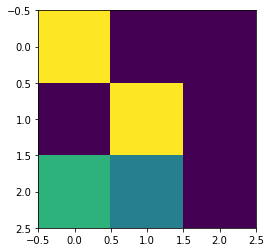

In [67]:
from matplotlib import pyplot as plt
plt.imshow(data['data'][0][0][1])
# data['data'][0][0][2]

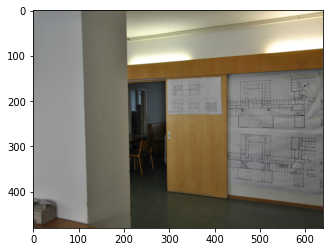

In [76]:
plt.imshow(data['data'][0][0][2])

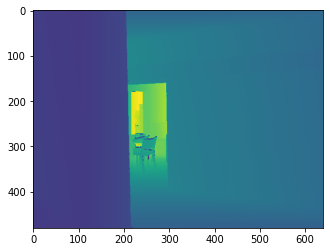

In [77]:
plt.imshow(data['data'][0][0][3])

In [ ]:
# K metric
data['data'][0][0][1]

array([[550.38842969,   0.        ,   0.        ],
       [  0.        , 548.54628433,   0.        ],
       [355.43624278, 240.25517383,   1.        ]])

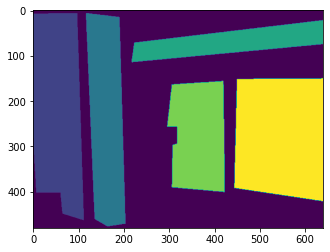

In [87]:
plt.imshow(data['data'][0][0][8])